In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset
df = pd.read_csv('processed_iot_sensor_data.csv', parse_dates=['timestamp'])

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Check for basic info and preview the data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 431941 entries, 2024-12-01 00:59:00 to 2024-12-30 23:59:00
Data columns (total 48 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   temperature                   431941 non-null  float64
 1   vibration                     431941 non-null  float64
 2   pressure                      431941 non-null  float64
 3   humidity                      431941 non-null  float64
 4   failure                       431941 non-null  int64  
 5   machine_id                    431941 non-null  int64  
 6   temperature_lag_1             431941 non-null  float64
 7   temperature_lag_2             431941 non-null  float64
 8   temperature_lag_3             431941 non-null  float64
 9   vibration_lag_1               431941 non-null  float64
 10  vibration_lag_2               431941 non-null  float64
 11  vibration_lag_3               431941 non-null  float64
 12  pressure_l

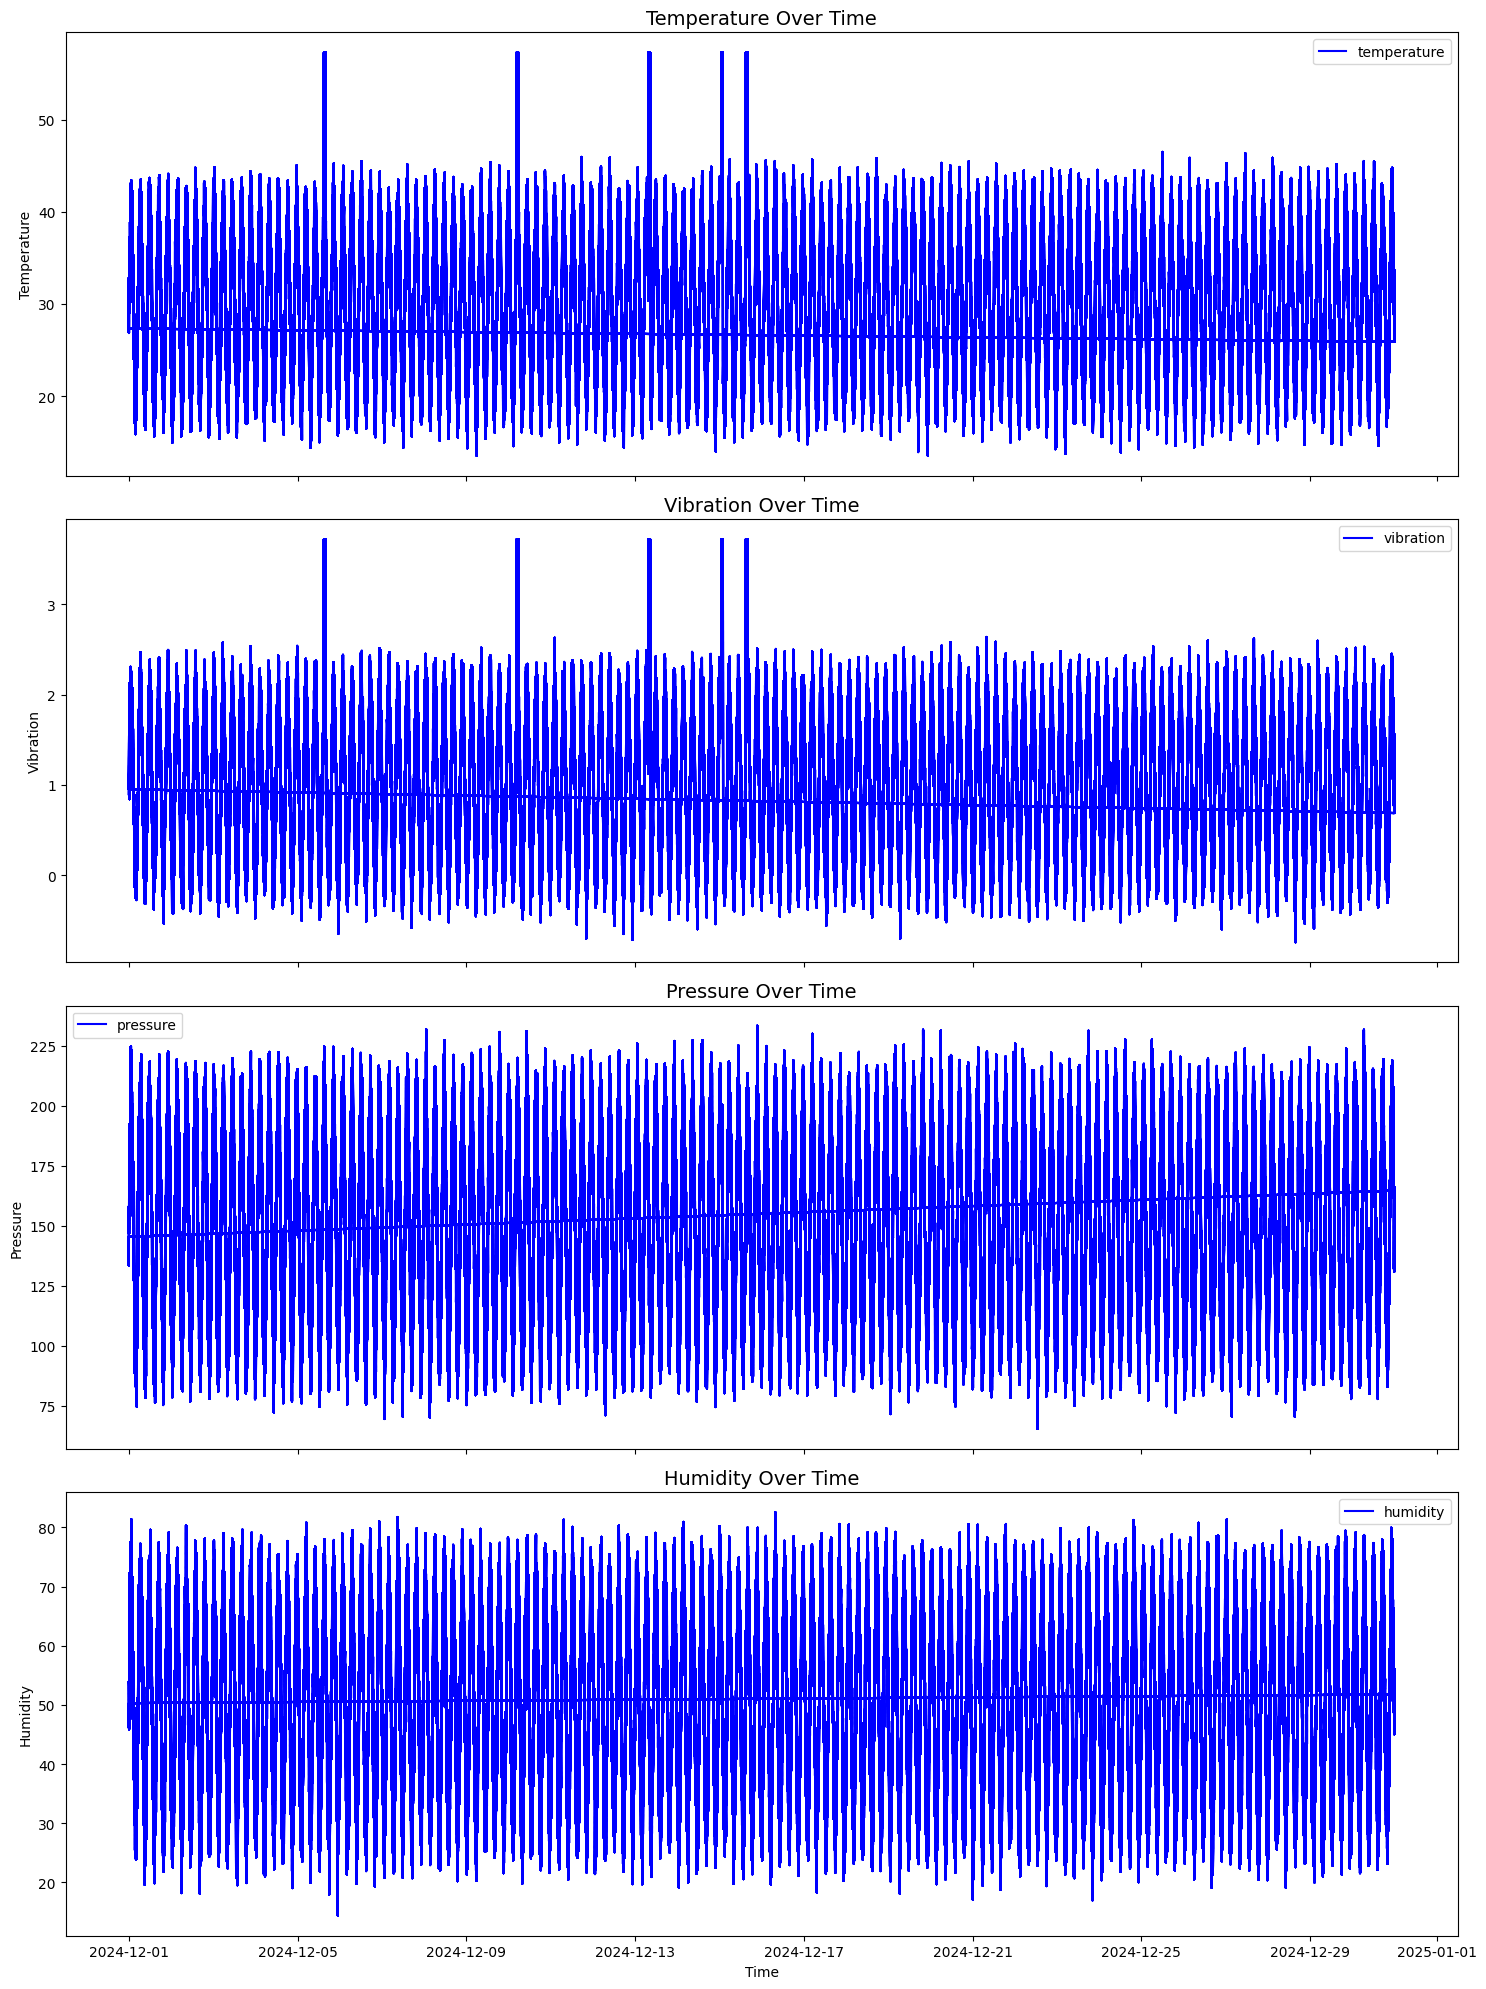

In [5]:
# Plot the time-series of each sensor
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

sensors = ['temperature', 'vibration', 'pressure', 'humidity']
for i, sensor in enumerate(sensors):
    axes[i].plot(df[sensor], label=f'{sensor}', color='b')
    axes[i].set_title(f'{sensor.capitalize()} Over Time', fontsize=14)
    axes[i].set_ylabel(sensor.capitalize())
    axes[i].legend()

plt.xlabel('Time')
plt.tight_layout()
plt.show()


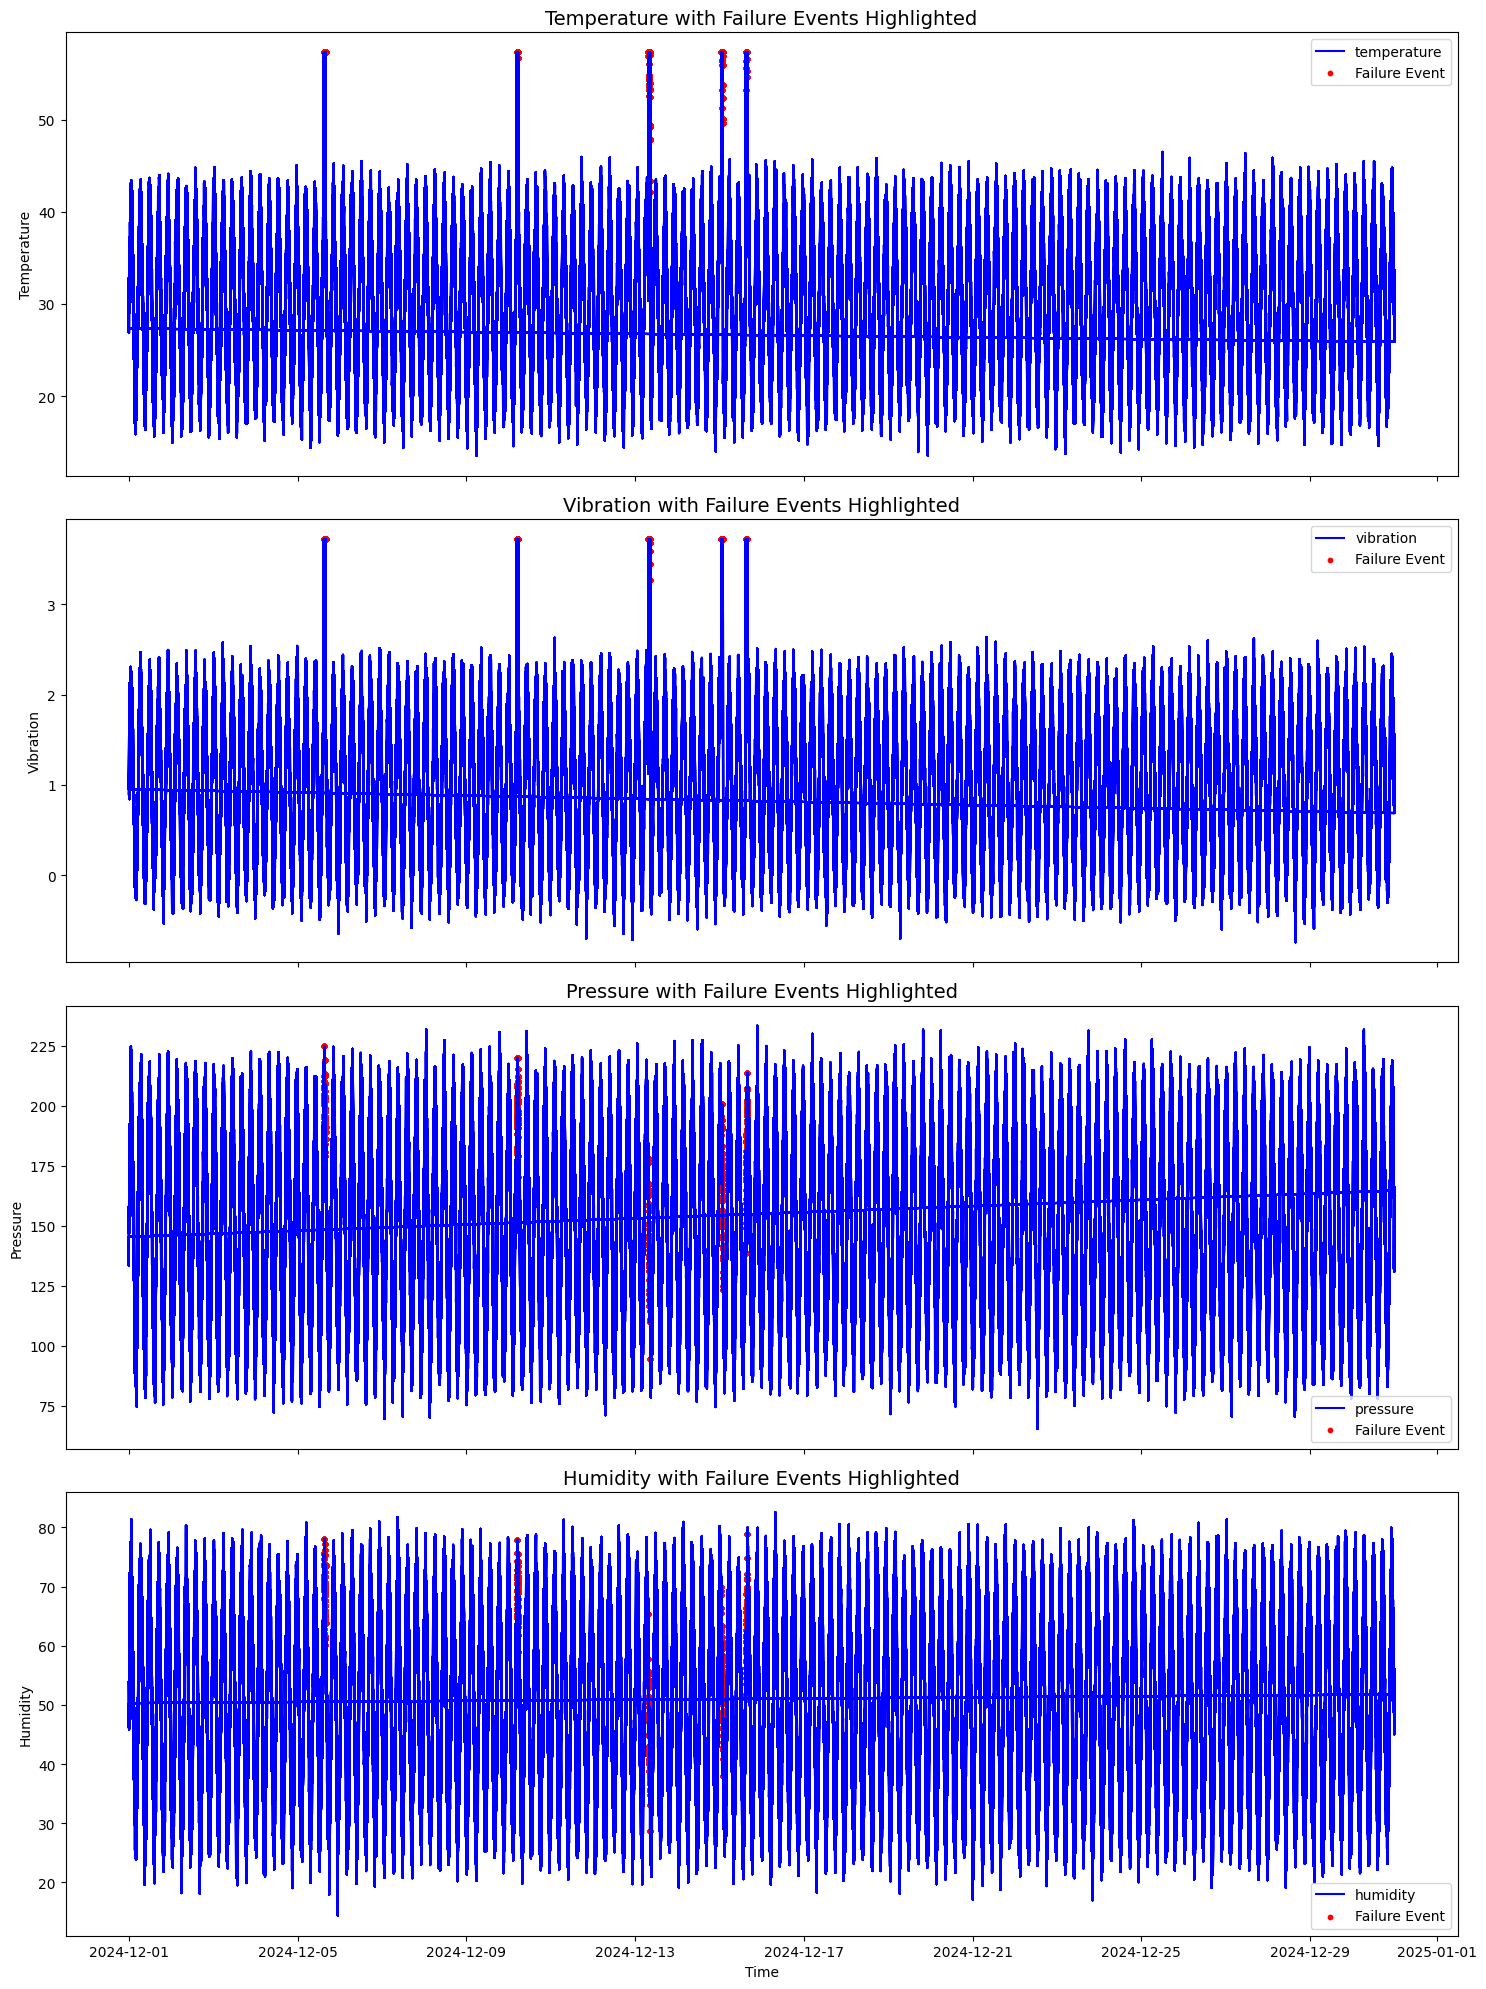

In [8]:
# Plot time-series with failure points highlighted
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

sensors = ['temperature', 'vibration', 'pressure', 'humidity']
for i, sensor in enumerate(sensors):
    axes[i].plot(df[sensor], label=f'{sensor}', color='b')
    axes[i].scatter(df[df['failure'] == 1].index, df.loc[df['failure'] == 1, sensor], 
                    color='red', label='Failure Event', s=10)
    axes[i].set_title(f'{sensor.capitalize()} with Failure Events Highlighted', fontsize=14)
    axes[i].set_ylabel(sensor.capitalize())
    axes[i].legend()

plt.xlabel('Time')
plt.tight_layout()
plt.show()


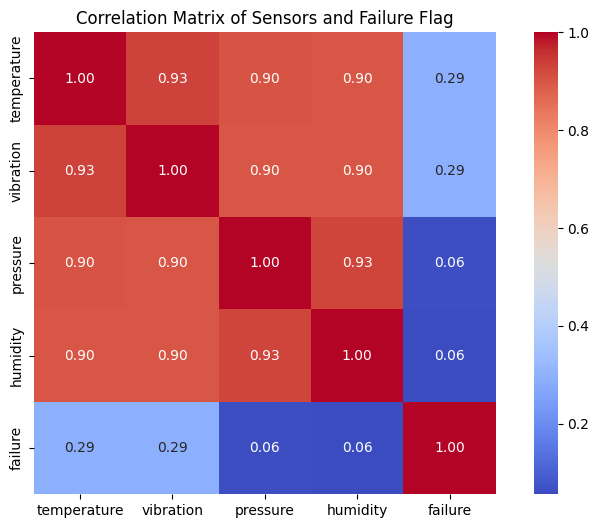

In [9]:
# Compute the correlation matrix
corr_matrix = df[['temperature', 'vibration', 'pressure', 'humidity', 'failure']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix of Sensors and Failure Flag')
plt.show()


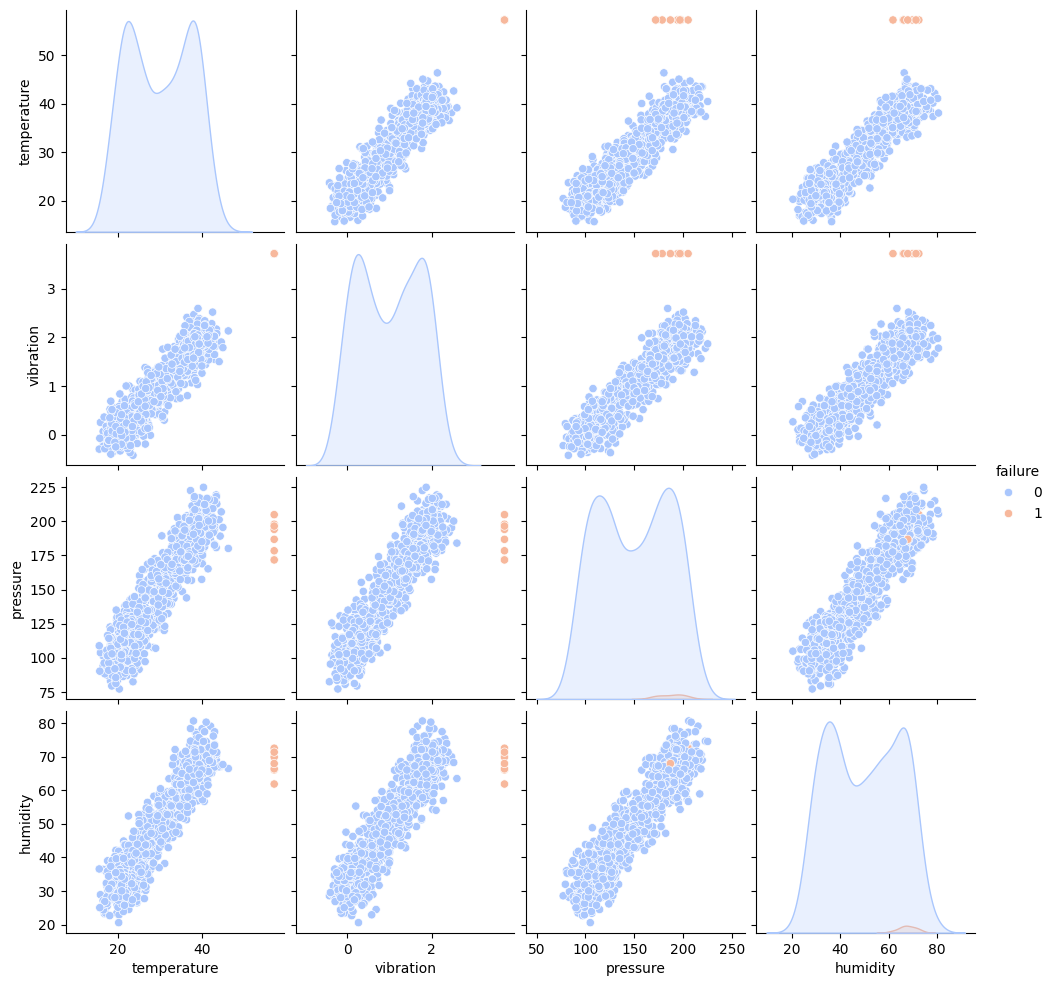

In [10]:
# Downsample the data for faster plotting (optional)
sampled_df = df.sample(1000, random_state=42)

# Create a pairplot of key features and the failure flag
sns.pairplot(sampled_df, vars=['temperature', 'vibration', 'pressure', 'humidity'], hue='failure', palette='coolwarm')
plt.show()


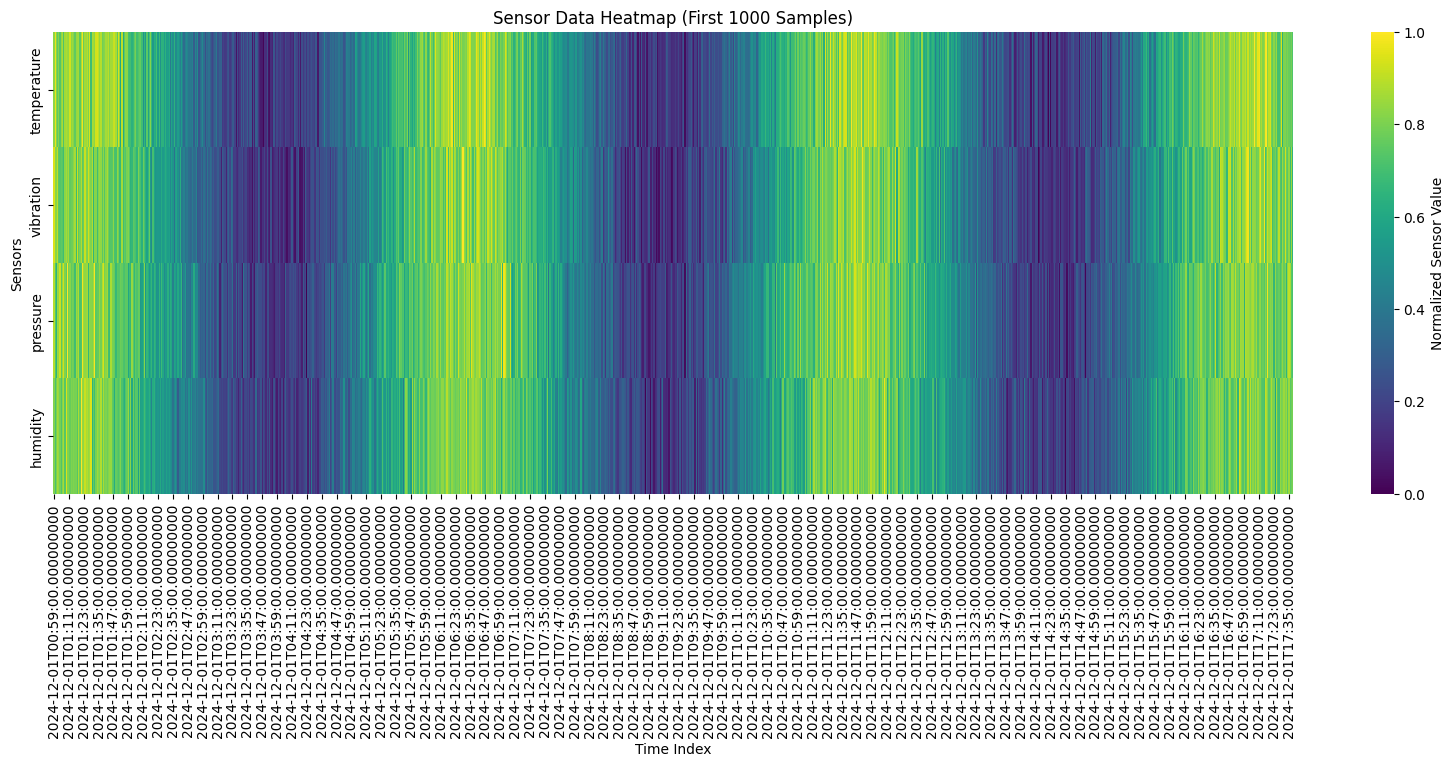

In [11]:
# Subset of data to avoid overcrowding
df_subset = df[['temperature', 'vibration', 'pressure', 'humidity']].head(1000)  # Reduce for better visualization

# Normalize the data (optional) to range [0, 1] for better visualization
normalized_df = (df_subset - df_subset.min()) / (df_subset.max() - df_subset.min())

# Plot the heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(normalized_df.T, cmap='viridis', cbar=True, cbar_kws={'label': 'Normalized Sensor Value'})
plt.title('Sensor Data Heatmap (First 1000 Samples)')
plt.xlabel('Time Index')
plt.ylabel('Sensors')
plt.show()


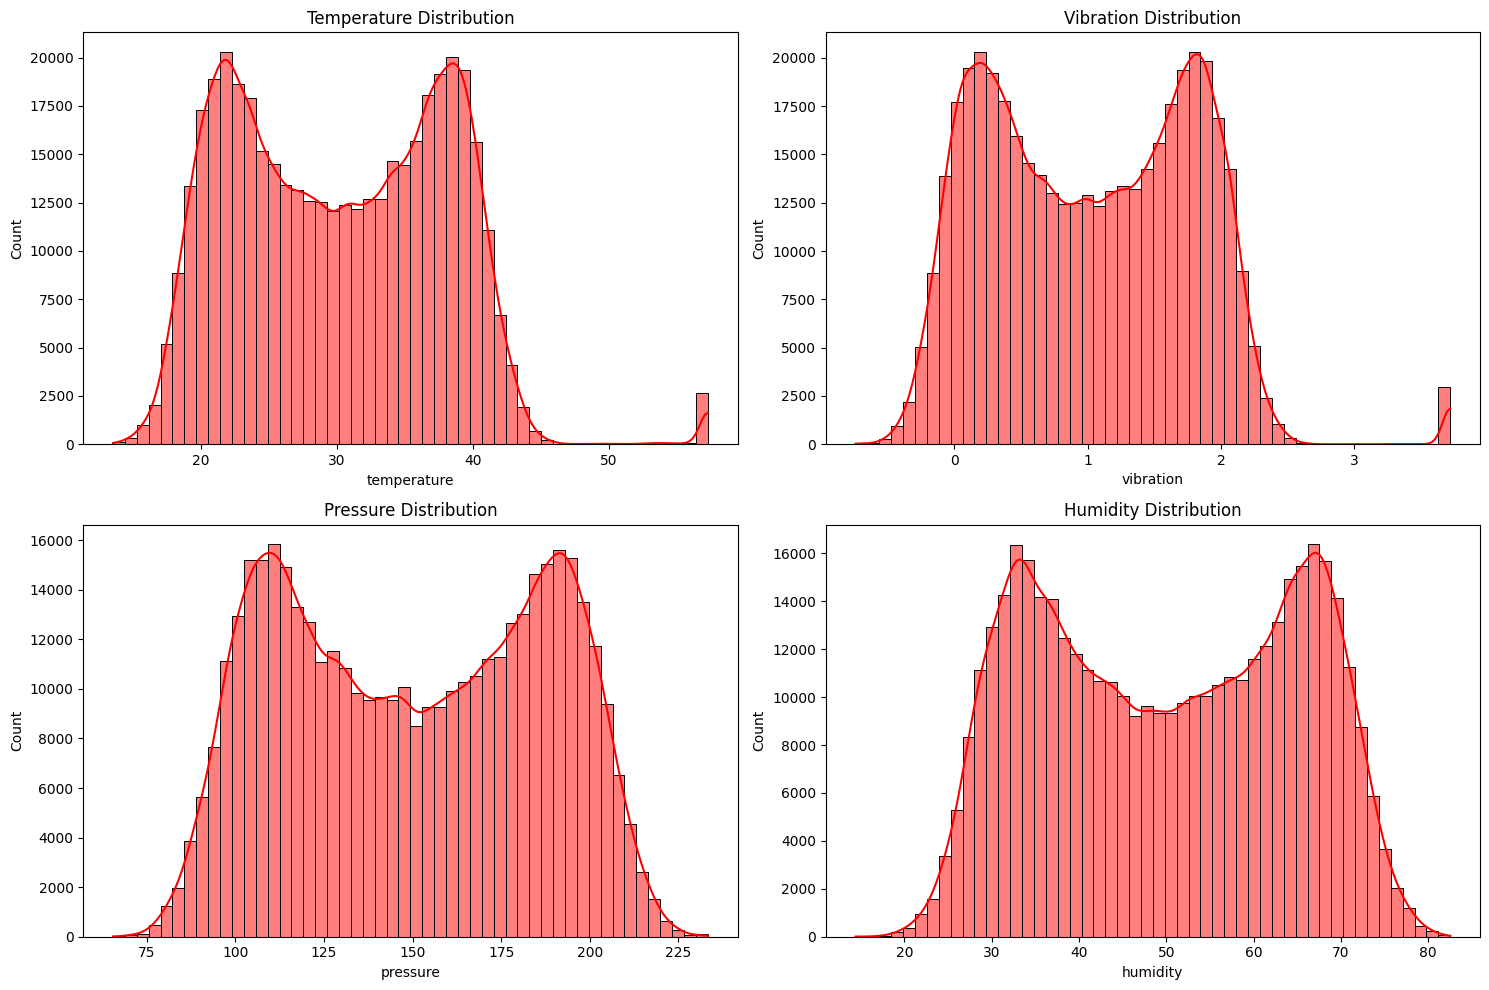

In [13]:
# Plot distribution plots for each sensor
sensors = ['temperature', 'vibration', 'pressure', 'humidity']

plt.figure(figsize=(15, 10))
for i, sensor in enumerate(sensors):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[sensor], kde=True, color='r', bins=50)
    plt.title(f'{sensor.capitalize()} Distribution')
    
plt.tight_layout()
plt.show()


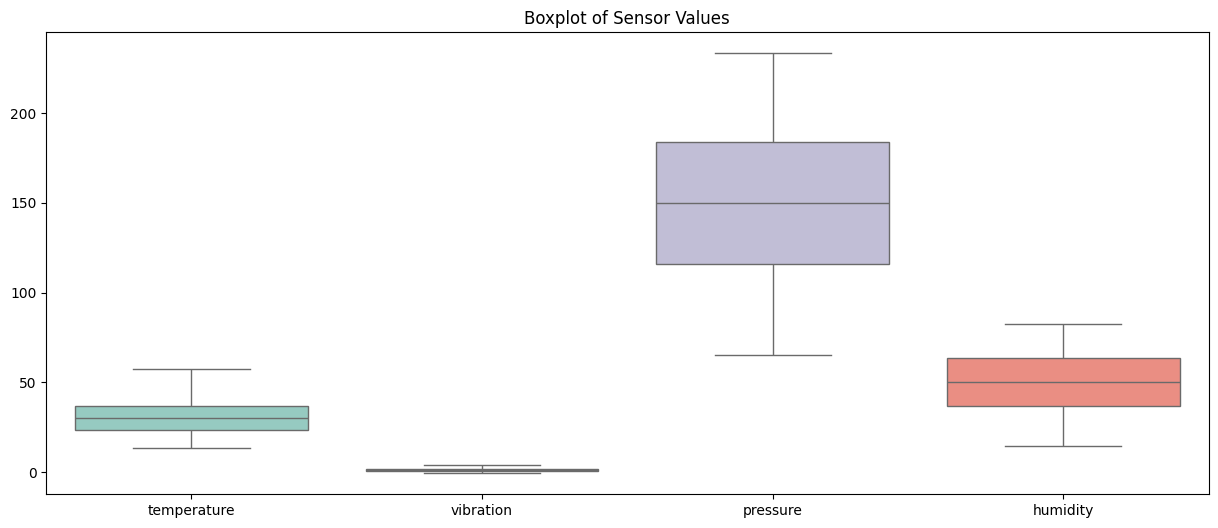

In [14]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['temperature', 'vibration', 'pressure', 'humidity']], palette='Set3')
plt.title('Boxplot of Sensor Values')
plt.show()
